In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Full_Finalized_numeric_data_for_training.csv')

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data_copy = data.copy()

In [6]:
X = data_copy.drop(["cityname","ZipCode","Duration","Label"],axis=1)

In [7]:
X

,state,persongender,personexactage,personmaritalstatus,traveler,investment,estimatedincomecode,PresenceOfCreditCard,CreditRating,hour
0,18,0,87,1,0,0,6,0,1,12
1,18,1,83,3,1,1,3,1,7,9
2,18,0,2,1,0,0,13,0,4,15
3,18,1,62,3,1,1,3,1,2,9
4,18,0,50,1,0,0,12,0,4,13
...,...,...,...,...,...,...,...,...,...,...
335869,16,1,69,3,1,1,3,1,8,12
335870,16,1,84,1,0,0,8,0,1,9
335871,16,0,88,3,1,0,8,1,1,14
335872,16,0,94,3,1,0,6,1,8,12


# SPLITING DATA

In [8]:
from sklearn.model_selection import train_test_split

# Seperating Data "sklearn" buildin Model

# Seperating Variables
y = data['Label']

# Spliting Data into two type(train, test)
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.10, random_state = 0)
print('Train Data',train_X,'\n Lenght of train Data', len(train_X))
print('Test Data',test_X,'\n Lenght of Test Data', len(test_X))

Train Data         state  persongender  personexactage  personmaritalstatus  traveler  \
113854     27             0              71                    2         0   
18618       0             0              50                    3         0   
244037     26             1              29                    2         1   
254665      3             1              77                    0         1   
71726      19             0              83                    3         1   
...       ...           ...             ...                  ...       ...   
122579     27             1              79                    2         1   
304137     14             1              72                    3         1   
152315     24             2              69                    3         1   
117952     27             0              79                    3         1   
305711     14             0               2                    2         0   

        investment  estimatedincomecode  PresenceOfC

In [9]:
#showing shape of splited data
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(302286, 10) (33588, 10) (302286,) (33588,)


# Training

In [9]:
from sklearn.linear_model import LinearRegression

# Using Regression Model
regression = LinearRegression()
regression.fit(train_X, train_y)
print('Model Trained')

Model Trained


# Predicting Data

In [10]:
pred_test_data = regression.predict(test_X)

In [11]:
pred_test_data

array([0.47424136, 0.51910438, 0.46848844, ..., 0.47516682, 0.49034219,
       0.47933404])

In [12]:
regression.score(test_X,test_y)

0.0018152426944099131

In [13]:
pred_test_dataframe =pd.DataFrame(test_X)

In [14]:
pred_test_dataframe

,state,cityname,persongender,personexactage,personmaritalstatus,traveler,ZipCode,investment,estimatedincomecode,PresenceOfCreditCard,CreditRating,hour
282850,5,1550,1,40,3,0,11801,1,16,1,7,13
15155,0,2036,0,2,2,1,92108,1,15,1,1,14
171399,10,1159,2,2,1,0,48134,1,2,1,7,9
131100,22,3805,1,81,3,1,20852,1,14,1,1,11
48759,21,1015,1,27,2,0,95821,0,0,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...
72630,19,999,2,2,3,1,52601,1,18,1,6,14
324797,29,441,0,40,3,1,16426,1,6,1,1,13
327881,29,4058,0,64,3,0,19567,1,9,1,1,13
196747,7,5134,1,37,3,1,63090,1,16,1,8,12


In [15]:
pred_test_dataframe['Actural Duration'] = test_y

In [16]:
pred_test_dataframe['Predict Duration'] = pred_test_data

In [17]:
train_data

,state,cityname,persongender,personexactage,personmaritalstatus,traveler,ZipCode,investment,estimatedincomecode,PresenceOfCreditCard,CreditRating,hour
0,18,5768,0,87,1,0,86429,0,6,0,1,12
1,18,4600,1,83,3,1,85939,1,3,1,7,9
2,18,4373,0,2,1,0,85712,0,13,0,4,15
3,18,4373,1,62,3,1,85736,1,3,1,2,9
4,18,3375,0,50,1,0,85335,0,12,0,4,13
...,...,...,...,...,...,...,...,...,...,...,...,...
335869,16,651,1,69,3,1,19468,1,3,1,8,12
335870,16,1520,1,84,1,0,19468,0,8,0,1,9
335871,16,3163,0,88,3,1,19468,0,8,1,1,14
335872,16,9064,0,94,3,1,19468,0,6,1,8,12


In [10]:
# train_data = data.iloc[:,:-2]

In [11]:
# train_data

In [12]:
# data

In [22]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris

# Loading data
# Data = data

# Create feature and target arrays
y =  data['Label']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)




KNeighborsClassifier(n_neighbors=8)

In [22]:
prediction = knn.predict(X_test)
prediction


array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [23]:
acc = round((knn.score(X_test, y_test))*100,2)
acc

51.16

In [19]:
import matplotlib.pyplot as plt
import numpy as np

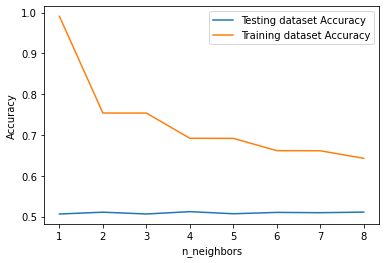

In [20]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
print(knn.score(X_test, y_test))

0.5111127651656122


In [27]:
train_data.corr()

,state,cityname,persongender,personexactage,personmaritalstatus,traveler,ZipCode,investment,estimatedincomecode,PresenceOfCreditCard,CreditRating,Duration
state,1.000000,-0.000062,-0.036591,0.015855,0.016344,0.060726,-0.468103,0.015791,0.005591,0.033855,-0.005540,-0.007010
cityname,-0.000062,1.000000,0.004346,-0.004631,-0.001263,-0.004794,0.017532,-0.003145,0.002119,-0.004069,-0.000732,-0.001372
persongender,-0.036591,0.004346,1.000000,-0.063544,-0.018820,-0.018595,0.031653,-0.004041,-0.000653,-0.000931,0.000833,-0.001534
personexactage,0.015855,-0.004631,-0.063544,1.000000,0.245521,0.098880,0.006677,-0.000875,0.002134,0.000317,0.000356,-0.000633
personmaritalstatus,0.016344,-0.001263,-0.018820,0.245521,1.000000,0.300462,-0.002540,0.000584,0.001306,0.001165,-0.000488,0.002195
traveler,0.060726,-0.004794,-0.018595,0.098880,0.300462,1.000000,-0.050252,0.001128,0.001886,0.000281,0.000751,0.001379
ZipCode,-0.468103,0.017532,0.031653,0.006677,-0.002540,-0.050252,1.000000,-0.031510,-0.012614,-0.030352,0.007779,0.009559
investment,0.015791,-0.003145,-0.004041,-0.000875,0.000584,0.001128,-0.031510,1.000000,0.091145,0.415126,0.008151,0.004692
estimatedincomecode,0.005591,0.002119,-0.000653,0.002134,0.001306,0.001886,-0.012614,0.091145,1.000000,0.173423,-0.015437,0.000175
PresenceOfCreditCard,0.033855,-0.004069,-0.000931,0.000317,0.001165,0.000281,-0.030352,0.415126,0.173423,1.000000,0.002726,0.005745


# SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(C=10)

In [25]:
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
model.score(X_test, y_test)